### Описание проекта
- Вас пригласили на стажировку в отдел аналитики Яндекс.Афиши. Первое задание: помочь маркетологам оптимизировать маркетинговые затраты.

**У вас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:**

- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.


### Шаг 1. Загрузите данные и подготовьте их к анализу
- Загрузите данные о визитах, заказах и расходах в переменные.
- Оптимизируйте данные для анализа.
- Убедитесь, что тип данных в каждой колонке — правильный. 

Путь к файлам: /datasets/visits_log.csv /datasets/orders_log.csv /datasets/costs.csv

## Импорт библиотек и предобработка данных

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

**Во всех файлах следует привести столбцы к удобному для анализа вида, а датам придать нужный формат**

In [173]:
visits = pd.read_csv('/datasets/visits_log.csv')
visits.info()
visits.columns = ['device', 'end_ts','source_id','start_ts','uid']
visits['end_ts'] = visits['end_ts'].astype('datetime64')
visits['start_ts'] = visits['start_ts'].astype('datetime64')
visits.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [174]:
orders = pd.read_csv('/datasets/orders_log.csv')
orders.info()
orders.columns = ['buy_ts', 'revenue','uid']
orders['buy_ts'] = orders['buy_ts'].astype('datetime64')
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [175]:
costs = pd.read_csv('/datasets/costs.csv')
costs.info()
costs['dt'] = costs['dt'].astype('datetime64')
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


#### Вывод
Данные были обработаны и приведены к нужному виду, пропусков в данных нет, можно приступать к анализу.

### Шаг 2. Постройте отчёты и посчитайте метрики
**Рассмотрим продукт**
   - Сколько людей пользуются в день, неделю, месяц?
   - Сколько сессий в день?
   - Сколько длится одна сессия?
   - Как часто люди возвращаются?

## Рассмотрим сколько людей пользуются в день, неделю и месяц

- Рассчитаем метрики - DAU, WAU, MAU

In [176]:
# Введем новые столбцы для работы с датами
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week'] = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

In [177]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


Рассчитаем метрики

In [178]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

#### Вывод

In [179]:
print('DAU = {}, WAU = {}, MAU = {}'.format(int(dau_total),int(wau_total),int(mau_total)))

DAU = 907, WAU = 5716, MAU = 23228


## Рассмотрим количество сессий в день

- Найти эту метрику просто — разделим число сессий на количество пользователей за период

In [180]:
sessions_per_day = visits.groupby(['session_year','session_date']).agg({'uid': ['count','nunique']})

In [181]:
sessions_per_day.columns = ['n_sessions', 'n_users']
sessions_per_day['sess_per_user'] = sessions_per_day['n_sessions'] / sessions_per_day['n_users']
sessions_per_day['sess_per_user'].mean()

1.082169644003972

#### Вывод
- В среднем пользователи совершают 1 сессию в день

## Рассмотрим среднюю длительность одной сессии
- Рассчитаем метрику ASL

In [182]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

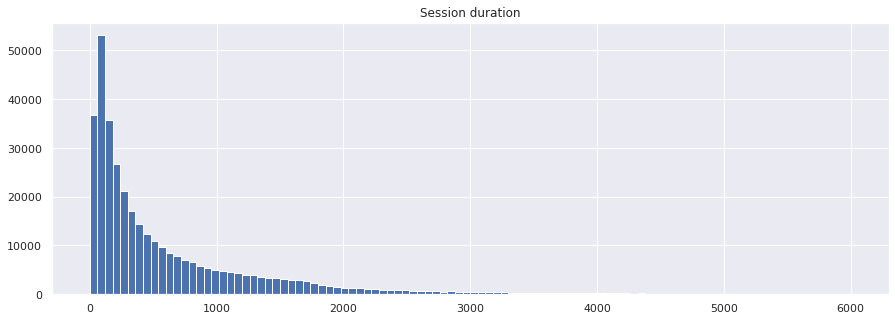

In [183]:
sns.set()
visits['session_duration_sec'].hist(bins= 100, range = [0,6000],figsize = (15,5)).set_title('Session duration');

In [184]:
visits['session_duration_sec'].mode()

0    60
dtype: int64

In [185]:
visits['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

<div class="alert alert-block alert-info">
<b>Note:</b> Таймштампы в логах проставлены поминутно, это объясняет большое количество "нулевых" длительностей сессии, поэтому все, что меньше 1 минуты записывается как 0
</div>

#### Вывод
- Чаще всего сессии длятся от 1 до 2 минут (60 - 119 сек. логируется как 60 сек.)
- 75% сессий длятся не более 15 минут

## Как часто люди возвращаются?
Будем рассчитывать retention rate

In [186]:
# Сгруппируем пользователей по времени первой сессии и добавим его в исходную таблицу с посещениями

first_session = visits.groupby('uid')['start_ts'].min()
first_session.name = 'first_session'
visits = pd.merge(visits,first_session,on='uid')

In [187]:
# Введем дополнительные столбцы для дальнейшего анализа и приведем к нужному типу

visits['first_month'] = visits['first_session'].astype('datetime64[M]')
visits['session_month'] = visits['session_date'].astype('datetime64[M]')

In [188]:
# Рассчитаем время жизни когорты

visits['cohort_lifetime'] = ((visits['session_month'] - visits['first_month']) / np.timedelta64(1,'M')).round().astype('int')
visits['first_month'] = visits['first_month'].dt.strftime('%Y-%m')

In [189]:
# Сгруппируем visits по когортам и времени жизни, а затем рассчитаем количество уникальных пользователей в когорте

cohorts = visits.groupby(['first_month','cohort_lifetime'])['uid'].nunique().reset_index()

In [190]:
# Запишем в новый df исходное количество пользователей в когортах 

inital_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_month','uid']]
inital_users_count = inital_users_count.rename(columns={'uid':'cohort_users'})
inital_users_count.head()

,first_month,cohort_users
0,2017-06,13259
12,2017-07,13140
23,2017-08,10181
33,2017-09,16704
42,2017-10,25977


In [191]:
# И присоеденив его к df cohorts, рассчитаем user retention

cohorts = cohorts.merge(inital_users_count,on='first_month')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

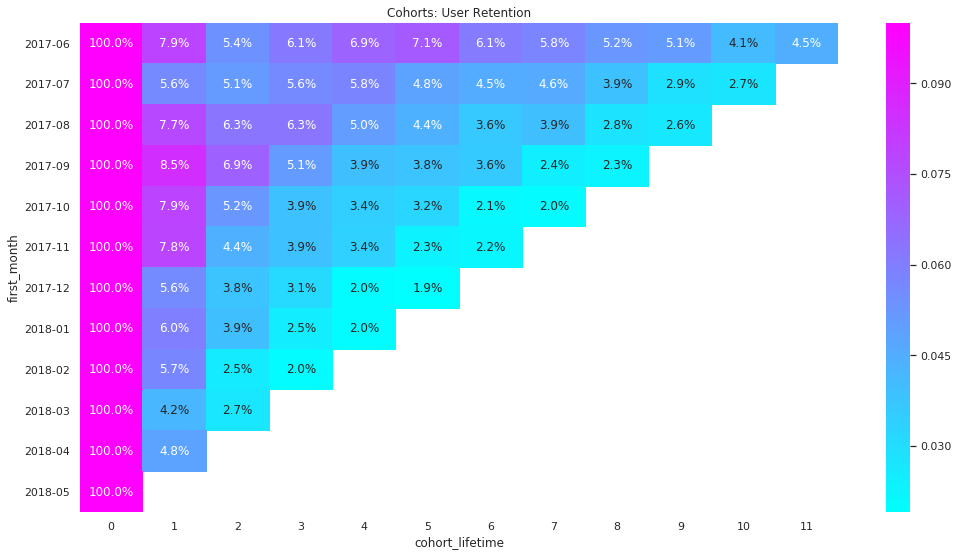

In [192]:
#Создадим сводную таблицу и наложим тепловую карту seaborn

retention_pivot = cohorts.pivot_table(
    index='first_month',
    columns='cohort_lifetime',
    values='retention',aggfunc='sum')
retention_pivot.fillna('')

sns.set(style='white')
plt.figure(figsize=(17, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%',vmax=0.10,cmap="cool");

#### Вывод
- Коэффициент удержания чрезвычайно мал и на второй месяц падает более чем на 90% для каждой когорты, скорее всего это связано с тем, что "Яндекс.Афишу" можно отнести к категории продуктов, которые используются лишь в случаях возникновения реальной потребности (покупки билета на определенное мероприятие и т.п.) и далее к нему не возврающаются, остальные же начинают пользоваться сервисом на регулярной основе


- Самый большой процент удержания у сентябрьской когорты, также в ноябре для всех когорт наблюдается небольшое повышение процента вернувшихся людей, возможно это связано с стимулирующей рассылкой, либо чем-то подобным


- Нужно формировать у пользователей привычку пользоватся сервисом для увелечения коэффицента удержания

**Рассмотрим продажи**
- Когда люди начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек?
- Сколько денег приносят? (LTV)

## Когда люди начинают покупать?

In [193]:
# Соеденим дату первой сессии пользователя и таблицу orders

first_session = visits[['uid','first_session']]
first_buyers = orders.merge(first_session, on='uid',how='left')
first_buyers.head()

,buy_ts,revenue,uid,first_session
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00


In [194]:
# Проверим и удалим дубли
first_buyers.duplicated().value_counts()

True     711392
False     50415
dtype: int64

In [195]:
first_buyers = first_buyers.drop_duplicates().reset_index(drop=True)

**Выделим первые покупки**

In [196]:
first_buy = first_buyers.groupby('uid')['buy_ts'].min()
first_buy.name = 'first_buy'
first_buyers = pd.merge(first_buyers,first_buy,on='uid')
first_buyers.head()

,buy_ts,revenue,uid,first_session,first_buy
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06-01 07:58:00


In [197]:
# Создадим новый df где оставим только нужные нам стольцы, а затем удалим дубликаты, оставив только уникальных покупателей
cleanbuyers = first_buyers[['uid','first_session','first_buy']]

In [198]:
cleanbuyers = cleanbuyers.drop_duplicates().reset_index(drop=True)
cleanbuyers['uid'].value_counts().head()

8936079926008794451     1
5476825120295766215     1
1621591832945386943     1
16075438678603709035    1
1885177505990994480     1
Name: uid, dtype: int64

*Остались только уникальные пользователи*

In [199]:
# Вычислим время от первой сессии, до первой покупки

cleanbuyers['seconds_to_buy'] = (cleanbuyers['first_buy'] - cleanbuyers['first_session']).dt.seconds
cleanbuyers.head()

,uid,first_session,first_buy,seconds_to_buy
0,10329302124590727494,2017-06-01 00:09:00,2017-06-01 00:10:00,60
1,11627257723692907447,2017-06-01 00:14:00,2017-06-01 00:25:00,660
2,17903680561304213844,2017-06-01 00:25:00,2017-06-01 00:27:00,120
3,16109239769442553005,2017-06-01 00:14:00,2017-06-01 00:29:00,900
4,14200605875248379450,2017-06-01 07:31:00,2017-06-01 07:58:00,1620


**Категорезируем пользователей по времени до покупки**

In [200]:
cleanbuyers['seconds_to_buy'].describe()

count    36523.000000
mean     14949.881445
std      25784.567076
min          0.000000
25%        240.000000
50%        960.000000
75%      15120.000000
max      86340.000000
Name: seconds_to_buy, dtype: float64

In [201]:
def category_time(row):
    seconds = row['seconds_to_buy']
    if seconds < 240:
        return '0 - 5 минут'
    if seconds <= 960:
        return '5 - 17 минут'
    if seconds <= 15120:
        return '17 минут - 4 часа'
    else:
        return 'больше 4 часов'
    
cleanbuyers['category'] = cleanbuyers.apply(category_time, axis = 1)

In [202]:
pie = cleanbuyers.groupby('category')['uid'].count().reset_index()

labels = pie.category
values = pie.uid

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values,hole=0.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='label+value+percent'
                  )
fig.update_layout(
    title_text="Time to order")
fig.show()

In [203]:
cleanbuyers['seconds_to_buy'].mode()

0    60
dtype: int64

#### Вывод
- Больше всего первых заказов совершается в промежутке от 1 до 2 минут от начала первой сессии
- 50% первых заказов совершаются в течении 17 минут от начала первой сессии
- 75% первых заказов совершаются в течении 4 часов от начала первой сессии

## Сколько раз покупают за период?

**Отобразим количество покупок за период**

In [204]:
# Введем новые столбцы для дальнейшего анализа

first_buyers['first_buy_month'] = first_buyers['first_buy'].astype('datetime64[M]')
first_buyers['buy_month'] = first_buyers['buy_ts'].astype('datetime64[M]')

In [205]:
fig = px.line(first_buyers.groupby('buy_month')['revenue'].count().reset_index(), x='buy_month', y='revenue')
fig.update_layout(
    title_text="Orders per month")
fig.show()

In [206]:
first_buyers.groupby('buy_month')['revenue'].count().mean()

3878.076923076923

#### Вывод
- С августа 2017г. по сентябрь 2017г. кол-во закзаов стремительно выросло на 4411ед. до 6218ед.
- Далее наблюдается спад, на май 2018 кол-во заказов = 4346
- Среднее количество покупок в месяц - 3878

## Какой средний чек?

Построим ящик с усами и посмотрим на распределение

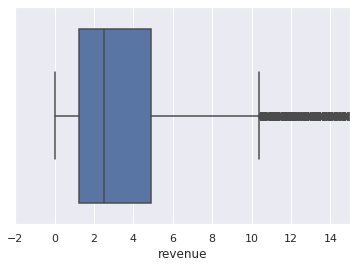

In [207]:
sns.set()
a= sns.boxplot(x=orders.revenue)
a.set_xlim([-2, 15]);


Распределение скошено влево и подвержено влиянию выбросов, поэтому возьмем медиану

In [208]:
print('Средний чек = {}'.format(orders.revenue.median()))

Средний чек = 2.5


## Сколько денег приносят? (LTV)

**Проанализируем LTV по когортам, рассчитаем CAC для каждой из них, а затем ROMI**


In [209]:
first_buyers.head() # Таблица покупателей выведеная ранее

,buy_ts,revenue,uid,first_session,first_buy,first_buy_month,buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [210]:
# Создадим таблицу с количеством покупателей в когорте

cohort_buyers_sizes = first_buyers.groupby('first_buy_month').agg({'uid': 'nunique'}).reset_index()
cohort_buyers_sizes.columns = ['first_buy_month', 'n_buyers']
cohort_buyers_sizes.head()

,first_buy_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [211]:
# Создадим таблицу с группировкой по когортам и месяцу покупке, аргументом передадим сумму выручки

b_cohorts = first_buyers.groupby(['first_buy_month','buy_month']).agg({'revenue': 'sum'}).reset_index()
b_cohorts.head()

,first_buy_month,buy_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [212]:
# Соеденим 2 полученных таблицы

report = pd.merge(cohort_buyers_sizes, b_cohorts, on='first_buy_month')
report.head()

,first_buy_month,n_buyers,buy_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


LTV считают из валовой прибыли, поэтому введем коэффициент маржинальности

In [213]:
margin_rate = 1 # т.к. в проекте отсутствуют данные о маржинальности, примем её за 100%

In [214]:
# Рассчитаем валовую прибыль, возраст когорты и ltv

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['buy_month'] - report['first_buy_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['first_buy_month'] = report['first_buy_month'].dt.strftime('%Y-%m') 
report['ltv'] = report['gp'] / report['n_buyers']
report.head()

,first_buy_month,n_buyers,buy_month,revenue,gp,age,ltv
0,2017-06,2023,2017-06-01,9557.49,9557.49,0,4.724414
1,2017-06,2023,2017-07-01,981.82,981.82,1,0.485329
2,2017-06,2023,2017-08-01,885.34,885.34,2,0.437637
3,2017-06,2023,2017-09-01,1931.30,1931.30,3,0.954671
4,2017-06,2023,2017-10-01,2068.58,2068.58,4,1.022531


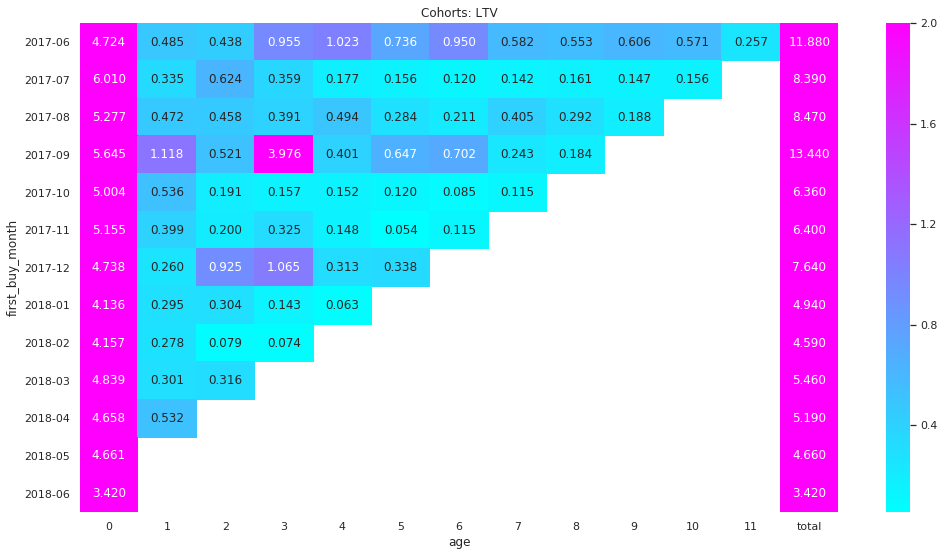

In [215]:
# Создадим сводную таблицу по когротам со средним ltv

output = report.pivot_table(
        index='first_buy_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(3)
    
output.fillna('')
sns.set(style='white')
plt.figure(figsize=(17, 9))
plt.title('Cohorts: LTV')
output['total'] = output.sum(axis=1).round(2)
sns.heatmap(output, annot=True, fmt='.3f',vmax=2,cmap="cool");

#### Вывод
- Первая когорта явно лидирует, следует проанализировать источник такой качественной аудитории
- Как можно заметить на данный момент больше всего денег принесли покупатели из 4 и 1 когорты, накопительные LTV по ним - 13,4 и 11,9
- Основную часть денег покупатели приносят в 1 месяц жизни, что связано со спецификой сервиса (использование в случае необходимости)
- Сентябрькая когорта на 4 месяце жизни показала очень необычный резултат, следует проанализировать причины такой активности

In [216]:
costs['month'] = costs['dt'].astype('datetime64[M]')

Посчитаем CAC

CAC на когорту = затраты/кол-во покупателей

In [217]:
# Рассчитаем затраты на рекламу по месяцам

monthly_costs = costs.groupby('month')['costs'].sum().reset_index()
monthly_costs['month'] = monthly_costs['month'].dt.strftime('%Y-%m') 
monthly_costs.head()

,month,costs
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88


In [218]:
#Добавим данные о расходах в отчёт и посчитаем CAC

report_new = pd.merge(report, monthly_costs, left_on='first_buy_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.head()

,first_buy_month,n_buyers,buy_month,revenue,gp,age,ltv,month,costs,cac
0,2017-06,2023,2017-06-01,9557.49,9557.49,0,4.724414,2017-06,18015.0,8.905091
1,2017-06,2023,2017-07-01,981.82,981.82,1,0.485329,2017-06,18015.0,8.905091
2,2017-06,2023,2017-08-01,885.34,885.34,2,0.437637,2017-06,18015.0,8.905091
3,2017-06,2023,2017-09-01,1931.30,1931.30,3,0.954671,2017-06,18015.0,8.905091
4,2017-06,2023,2017-10-01,2068.58,2068.58,4,1.022531,2017-06,18015.0,8.905091


## ROMI / когорты

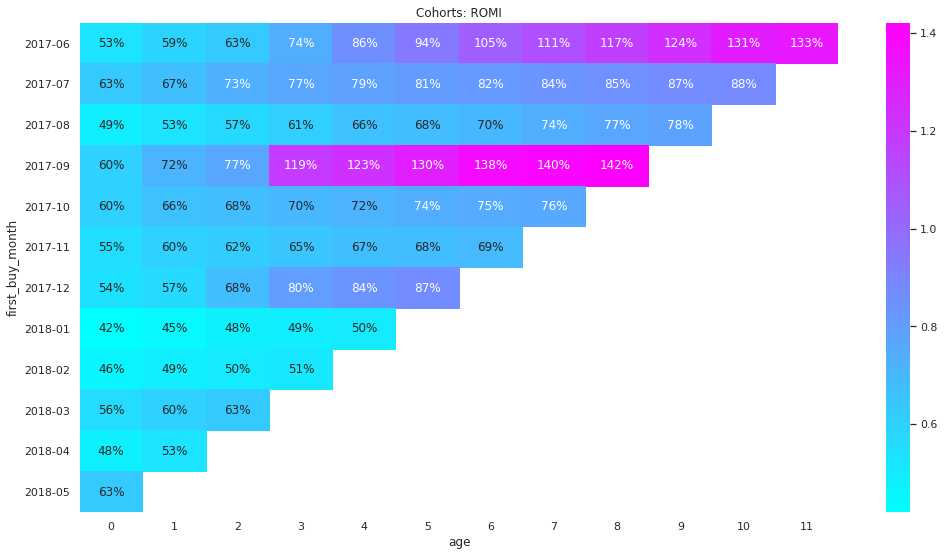

In [219]:
#Рассчитаем ROMI: поделим LTV на CAC.
#Чтобы посчитать накопительный ROMI, вызовем метод cumsum()

report_new['romi'] = report_new['ltv'] / report_new['cac']
output_romi = report_new.pivot_table(
        index='first_buy_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean').cumsum(axis=1).round(2)

sns.set(style='white')
plt.figure(figsize=(17, 9))
plt.title('Cohorts: ROMI')
sns.heatmap(output_romi, annot=True, fmt='.0%',cmap="cool");

In [220]:
# Рассчитаем среднюю окупаемость когорт
output_romi.mean(axis=0)

age
0     0.540833
1     0.582727
2     0.629000
3     0.717778
4     0.783750
5     0.860000
6     0.898333
7     0.970000
8     1.052500
9     0.963333
10    1.095000
11    1.330000
dtype: float64

#### Вывод
- Как можно заметить на данный момент окупилась только 1 (на 7 месяц) и 4 (на 4 месяц) когорта
- Когорты 2,3,5,7 близки к этому
- В среднем когорта окупается на 9 месяц


## Сколько всего потратили денег? 


<div class="alert alert-block alert-info">
<b>Note:</b> Для дальнейшего анализа нам потребуется соеденить таблицы orders и visits, для того, чтобы произвести анализ по источникам.
Так как некоторые покупатели совершают не одну покупку и имеют свойства переходить в сервис с разных рекламных источников,
было принято решение оставить только уникальных покупателей с первым источником, через который они попали в сервис, а выручку по каждому суммировать.
</div>

In [221]:
# Сгруппируем данные по uid и выручке, выведем общую выручку по таблицу orders

orders.head()
o1 = orders.groupby('uid')['revenue'].sum().reset_index()
o1['revenue'].sum()

252057.2

In [222]:
o2 = visits.copy()

# Добавим к uid в visits(o2) общую сумму их покупок
o2 = o2.merge(o1, on ='uid')
# Сгруппируем o2 по uid и выведем первую сессию 
o3 = o2.groupby('uid')['start_ts'].min().reset_index()
# Соеденим о2 и о3 по uid и мин.сессии методом inner
o4 = o2.merge(o3, on = ['uid','start_ts'], how = 'inner')
# Выведем общую выручку
o4['revenue'].sum()

252057.2

In [223]:
o4['uid'].value_counts().head()

8936079926008794451     1
48323333547121531       1
15995579386502233798    1
15875486844586996236    1
14266635085041064273    1
Name: uid, dtype: int64

Выручки совпадают, в таблице только уникальные пользователи - соединение выполнено корректно.

In [224]:
print('Всего потрачено за 12 месяцев = {}'.format(o4['revenue'].sum()))

Всего потрачено за 12 месяцев = 252057.2


## Сколько потрачено по времени / источникам

In [252]:
fig = px.bar(
    o4.groupby(['source_id','session_month'])['revenue'].sum().reset_index(),
    x='session_month', y='revenue',color='source_id')
fig.update_layout(title_text= 'Source : revenue / session_month')
fig.show()



#### Вывод
- Больше всего в сентябре тратили пользователи пришедшие через 5 канал
- Больше всего в декабре тратили пользователи пришедшие через 2 канал
- В остальные месяца явных лидеров среди каналов не наблюдается
- Лучшие месяца по выручке : июнь, сентябрь, декабрь
- Худшие месяца по выручке : август, апрель, май
- В августе на всех каналах наблюдается падение выручки



<div class="alert alert-block alert-warning">
<b>Обращение к проверяющему:</b> Помогите мне правильно интерпритировать график выше, мне кажется, что я что-то упускаю
</div>

## Сколько стоило привлечение одного покупателя из каждого источника?

Создадим новую таблицу, где по каждому источнику сгруппируем:
- затраты
- количество покупателей
- стоимость привлечения покупателя
- выручку

In [226]:
revenue_group = o4.groupby('source_id')['revenue'].sum().reset_index()
costs_group = costs.groupby('source_id')['costs'].sum().reset_index()
source_group = o4.groupby('source_id')['uid'].nunique().reset_index()
costs_group = costs_group.merge(source_group,on = 'source_id')
costs_group['cost_per_user'] = costs_group['costs'] / costs_group['uid']
costs_group = costs_group.merge(revenue_group,on = 'source_id')
costs_group

,source_id,costs,uid,cost_per_user,revenue
0,1,20833.27,2899,7.186364,31090.55
1,2,42806.04,3506,12.209367,46923.61
2,3,141321.63,10473,13.493901,54511.24
3,4,61073.60,10296,5.931779,56696.83
4,5,51757.10,6931,7.467479,52624.02
5,9,5517.49,1088,5.071222,5759.40
6,10,5822.49,1329,4.381106,4450.33


Рассчитаем валовую прибыль, ltv и roi

In [227]:
costs_group['gp'] = costs_group['revenue'] * margin_rate
costs_group['ltv'] = costs_group['gp'] / costs_group['uid']
costs_group['roi'] = costs_group['ltv'] / costs_group['cost_per_user'] *100
costs_group

,source_id,costs,uid,cost_per_user,revenue,gp,ltv,roi
0,1,20833.27,2899,7.186364,31090.55,31090.55,10.724577,149.235094
1,2,42806.04,3506,12.209367,46923.61,46923.61,13.383802,109.619133
2,3,141321.63,10473,13.493901,54511.24,54511.24,5.204931,38.572468
3,4,61073.60,10296,5.931779,56696.83,56696.83,5.506685,92.833614
4,5,51757.10,6931,7.467479,52624.02,52624.02,7.592558,101.674978
5,9,5517.49,1088,5.071222,5759.40,5759.40,5.293566,104.384421
6,10,5822.49,1329,4.381106,4450.33,4450.33,3.348631,76.433450


Визуализируем данные

In [228]:
def graphse(p1,p2,title):
    fig = go.Figure(data=[
        go.Bar(name= p1, x=costs_group.source_id, y=costs_group[p1],text=costs_group[p1].round(2),textposition='auto'),
        go.Bar(name= p2, x=costs_group.source_id, y=costs_group[p2],text=costs_group[p2].round(2),textposition='auto')
    ])
    fig.update_layout(xaxis_title_text='source', 
        yaxis_title_text='amount',
                          barmode='group',title_text= title)
    fig.show()
graphse('revenue','costs','Source : revenue / costs')
graphse('ltv','cost_per_user','Source : ltv / cost_per_user')

**На сколько окупились расходы? (ROI)**

In [229]:
costs_group.style.bar(subset=['roi', 'uid'], color='lightgreen')

,source_id,costs,uid,cost_per_user,revenue,gp,ltv,roi
0,1,20833.3,2899,7.18636,31090.5,31090.5,10.7246,149.235
1,2,42806,3506,12.2094,46923.6,46923.6,13.3838,109.619
2,3,141322,10473,13.4939,54511.2,54511.2,5.20493,38.5725
3,4,61073.6,10296,5.93178,56696.8,56696.8,5.50669,92.8336
4,5,51757.1,6931,7.46748,52624,52624,7.59256,101.675
5,9,5517.49,1088,5.07122,5759.4,5759.4,5.29357,104.384
6,10,5822.49,1329,4.38111,4450.33,4450.33,3.34863,76.4335


#### Вывод
### Source 1

Выручка > раходы, LTV > CAC, ROI = 149%

<span style='color: green;'>**Прибыльный источник**</span> 

**Рекомендуется вкладывать больше денег, источник прибыльный, привлечено всего 2899 покупателей, есть куда рости**
### Source 2

Выручка > раходы, LTV > CAC, ROI = 109%

<span style='color: green;'>**Прибыльный источник**</span>

**Также рекомендуется вкладывать деньги, мало того, что источник прибыльный, так и покупатели пришедшие через него, сделали в декабре самую большую выручку**
### Source 3

Расходы в 2,6 раза выше чем выручка, LTV меньше CAC в 2,6 раз, ROI = 39%

<span style='color: red;'>**Убыточный источник**</span>

**Категорически не рекомендуется вкладывать деньги, возможно, стоит отказаться от данного источника, либо проанализировать возможность снижения CAC**
### Source 4

Выручка < раходы, LTV < CAC, ROI = 92%

**Потенциально прибыльный источник**

**Источник на 2 месте по количеству привлеченных клиентов, почти окупается, рекомендуется проанализировать возможность снижения CAC**
### Source 5

Выручка > раходы, LTV > CAC, ROI = 101%

<span style='color: green;'>**Прибыльный источник**</span>

**Рекомендуется вкладывать деньги, аудитория пришедшая через данный источник сделала самую большую выручку в сентябре**
### Source 9

Выручка > раходы, LTV > CAC, ROI = 104%

**Потенциально прибыльный источник**

**Через источник привлечено всего 1088 клиентов, roi положительный, реккомендуется увеличить затраты**
### Source 10

Выручка < раходы, LTV < CAC, ROI = 76%

<span style='color: red;'>**Убыточный источник**</span>

**От источника рекомендуется отказаться**


## Распределение заказов по устройствам

In [244]:
pie2 = o4.groupby('device')['uid'].count().reset_index()
labelss = pie2.device
valuess = pie2.uid
fig = go.Figure(data=[go.Pie(labels=labelss, values=valuess,hole=0.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='label+value+percent'
                  )
fig.update_layout(
    title_text="Device : orders")
fig.show()

#### Вывод
- 80% заказов сделано с настольных компьютеров, что необычно при современном распределении трафика в сторону мобильных устройств, возможно это связано с тем, что настольная версия сервиса удобнее для пользователей, чем версия для смартфонов, либо приложение

## Общий вывод и рекомендации
### Рассматриваемый период : 2017-06  -  2018-06

**Все нижесказанное верно при margin_rate = 100%**


# Продукт

**DAU, WAU, MAU**
- DAU = 907, WAU = 5716, MAU = 23228

**Количество сессий в день**
- В среднем пользователи совершают 1 сессию в день

**ASL**
- Чаще всего сессии длятся от 1 до 2 минут (60 - 119 сек. логируется как 60 сек.)
- 75% сессий длятся не более 15 минут


**Retention rate**
- Коэффициент удержания чрезвычайно мал и на второй месяц падает более чем на 90% для каждой когорты, скорее всего это связано с тем, что "Яндекс.Афишу" можно отнести к категории продуктов, которые используются лишь в случаях возникновения реальной потребности (покупки билета на определенное мероприятие и т.п.) и далее к нему не возврающаются, остальные же начинают пользоваться сервисом на регулярной основе


- Самый большой процент удержания у сентябрьской когорты, также в ноябре для всех когорт наблюдается небольшое повышение процента вернувшихся людей, возможно это связано с стимулирующей рассылкой, либо чем-то подобным
- Необходимо проанализировать сентябрьскую когорту
- Необходимо формировать у пользователей привычку пользоватся сервисом для увелечения коэффицента удержания

# Продажи
**Когда люди начинают покупать?**
- Больше всего первых заказов совершается в промежутке от 1 до 2 минут от начала первой сессии
- 50% первых заказов совершаются в течении 17 минут от начала первой сессии
- 75% первых заказов совершаются в течении 4 часов от начала первой сессии


**Сколько раз покупают за период?**
- С августа 2017г. по сентябрь 2017г. кол-во закзаов стремительно выросло с 1807ед. до 6218ед.
- Далее наблюдается спад, на май 2018 кол-во заказов = 4346
- Среднее количество заказов в месяц - 3878

**Какой средний чек?**
- Распределение скошено влево и подвержено влиянию выбросов, поэтому возьмем медиану
- Средний чек = 2.5

**Сколько денег приносят? (LTV)**
- Первая когорта явно лидирует, следует проанализировать источник такой качественной аудитории
- Как можно заметить на данный момент больше всего денег принесли покупатели из 4 и 1 когорты, накопительные LTV по ним - 13,4 и 11,9
- Основную часть денег покупатели приносят в 1 месяц жизни, что связано со спецификой сервиса (использование в случае необходимости)
- Сентябрькая когорта на 4 месяце жизни показала очень необычный резултат, следует проанализировать причины такой активности

**ROMI на когорту**

- На данный момент окупилась только 1 (на 7 месяц) и 4 (на 4 месяц) когорта
- Когорты 2,3,5,7 близки к этому
- В среднем когорта окупается на 9 месяц

# Маркетинг

**Сколько всего потратили денег?**
- Всего потрачено за 12 месяцев = 252057.2

**Сколько потрачено по времени / источникам**
- Больше всего в сентябре тратили пользователи пришедшие через 5 канал
- Больше всего в декабре тратили пользователи пришедшие через 2 канал
- В остальные месяца явных лидеров среди каналов не наблюдается
- Лучшие месяца по выручке : июнь, сентябрь, декабрь
- Худшие месяца по выручке : август, апрель, май
- В августе на всех каналах наблюдается падение выручки

# Анализ источников

### Source 1

Выручка > раходы, LTV > CAC, ROI = 149%

<span style='color: green;'>**Прибыльный источник**</span> 

**Рекомендуется вкладывать больше денег, источник прибыльный, привлечено всего 2899 покупателей, есть куда рости**
### Source 2

Выручка > раходы, LTV > CAC, ROI = 109%

<span style='color: green;'>**Прибыльный источник**</span>

**Также рекомендуется вкладывать деньги, мало того, что источник прибыльный, так и покупатели пришедшие через него, сделали в декабре самую большую выручку**
### Source 3

Расходы в 2,6 раза выше чем выручка, LTV меньше CAC в 2,6 раз, ROI = 39%

<span style='color: red;'>**Убыточный источник**</span>

**Категорически не рекомендуется вкладывать деньги, возможно, стоит отказаться от данного источника, либо проанализировать возможность снижения CAC**
### Source 4

Выручка < раходы, LTV < CAC, ROI = 92%

**Потенциально прибыльный источник**

**Источник на 2 месте по количеству привлеченных клиентов, почти окупается, рекомендуется проанализировать возможность снижения CAC**
### Source 5

Выручка > раходы, LTV > CAC, ROI = 101%

<span style='color: green;'>**Прибыльный источник**</span>

**Рекомендуется вкладывать деньги, аудитория пришедшая через данный источник сделала самую большую выручку в сентябре**
### Source 9

Выручка > раходы, LTV > CAC, ROI = 104%

**Потенциально прибыльный источник**

**Через источник привлечено всего 1088 клиентов, roi положительный, реккомендуется увеличить затраты**
### Source 10

Выручка < раходы, LTV < CAC, ROI = 76%

<span style='color: red;'>**Убыточный источник**</span>

**От источника рекомендуется отказаться**

## Распределение заказов по устройствам

- 80% заказов сделано с настольных компьютеров, что необычно при современном распределении трафика в сторону мобильных устройств, возможно это связано с тем, что настольная версия сервиса удобнее для пользователей, чем версия для смартфонов, либо приложение